In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('서울시 부동산 실거래가 정보.csv')
data.head(3)

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명
0,2022,11260,중랑구,10100,면목동,1.0,대지,173.0,164.0,은하빌라,...,16000,50.35,28.50,3.0,NaN,NaN,1996.0,연립다세대,중개거래,서울 마포구
1,2022,11215,광진구,10500,자양동,1.0,대지,860.0,0.0,테라팰리스건대2차,...,105000,75.03,0.00,17.0,NaN,NaN,2018.0,아파트,중개거래,서울 강남구
2,2022,11680,강남구,10300,개포동,1.0,대지,1165.0,16.0,칠성빌라나동,...,69000,50.28,41.77,1.0,NaN,NaN,1989.0,연립다세대,중개거래,서울 강남구


In [18]:
new_col = ['접수연도','자치구명','물건금액(만원)','건물면적(㎡)','토지면적(㎡)','건축년도']
data_1 = data[new_col]
data_1['평당가격'] = data_1['물건금액(만원)']/data_1['건물면적(㎡)']
data_1['평당가격(만원)'] = data_1['평당가격']*3
data_1

C:\Users\human\AppData\Local\Temp\ipykernel_18632\543163404.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['평당가격'] = data_1['물건금액(만원)']/data_1['건물면적(㎡)']
C:\Users\human\AppData\Local\Temp\ipykernel_18632\543163404.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['평당가격(만원)'] = data_1['평당가격']*3


,접수연도,자치구명,물건금액(만원),건물면적(㎡),토지면적(㎡),건축년도,평당가격,평당가격(만원)
0,2022,중랑구,16000,50.35,28.50,1996.0,317.775571,953.326713
1,2022,광진구,105000,75.03,0.00,2018.0,1399.440224,4198.320672
2,2022,강남구,69000,50.28,41.77,1989.0,1372.315036,4116.945107
3,2022,성동구,13500,20.21,27.28,2016.0,667.986145,2003.958436
4,2022,강동구,22500,29.01,38.62,2017.0,775.594623,2326.783868
...,...,...,...,...,...,...,...,...
66322,2022,종로구,67000,49.50,222.00,2005.0,1353.535354,4060.606061
66323,2022,성북구,35000,57.95,42.40,1991.0,603.968939,1811.906816
66324,2022,성북구,110000,147.12,182.00,1968.0,747.688961,2243.066884
66325,2022,성북구,35000,57.95,42.40,1991.0,603.968939,1811.906816


In [33]:
data_2 = data_1.groupby('자치구명').mean()
data_3 = data_2.sort_values(by='평당가격(만원)',ascending=False)
data_3

,접수연도,물건금액(만원),건물면적(㎡),토지면적(㎡),건축년도,평당가격,평당가격(만원)
자치구명,,,,,,,
용산구,2022.0,162619.324105,87.727718,56.500506,1993.777551,1624.406861,4873.220583
성동구,2022.0,121037.240819,77.689746,41.082006,2001.071530,1615.261835,4845.785504
강남구,2022.0,123693.288933,72.116711,37.739940,1998.009132,1545.294917,4635.884750
서초구,2022.0,111785.487968,68.770150,34.718358,2002.588235,1489.370015,4468.110044
송파구,2022.0,64463.452044,53.054518,29.227206,2005.368098,1157.471188,3472.413564
마포구,2022.0,60952.376563,54.362344,34.151347,1996.354900,1095.837878,3287.513634
영등포구,2022.0,49945.424057,48.831682,30.878018,2010.281325,1048.670874,3146.012623
동작구,2022.0,58904.871960,60.339628,31.176370,2001.611700,1035.288612,3105.865837
중구,2022.0,51550.518164,52.921568,33.996147,2004.326923,1031.133072,3093.399215


<BarContainer object of 25 artists>

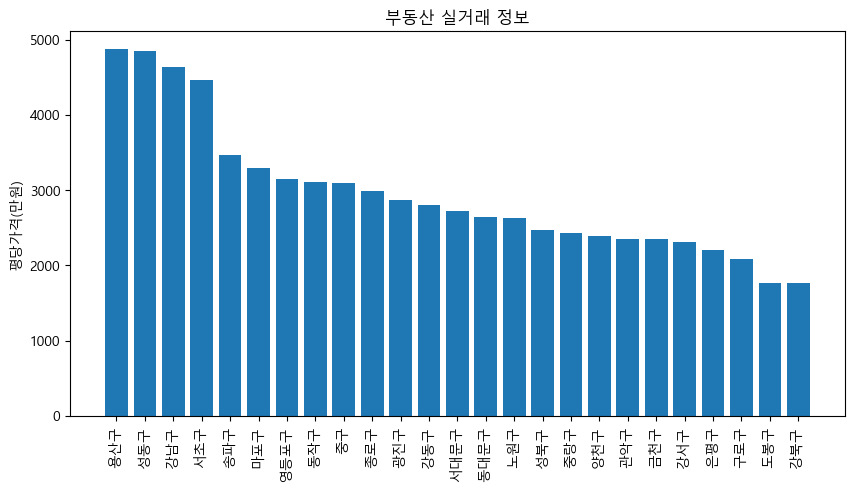

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.rcParams['font.family'] = 'Arial'  # Arial과 같은 한글 지원 폰트로 변경
plt.rcParams['axes.unicode_minus'] = False  # 음수 기호가 깨지는 문제 해결u
plt.rc('font', family='Malgun Gothic')
plt.tight_layout()
plt.xticks(rotation=90)
plt.ylabel('평당가격(만원)')
plt.title('부동산 실거래 정보')
plt.bar(data_3.index,data_3['평당가격(만원)'])

In [36]:
data

,접수연도,자치구코드,자치구명,법정동코드,법정동명,지번구분,지번구분명,본번,부번,건물명,...,물건금액(만원),건물면적(㎡),토지면적(㎡),층,권리구분,취소일,건축년도,건물용도,신고구분,신고한 개업공인중개사 시군구명
0,2022,11260,중랑구,10100,면목동,1.0,대지,173.0,164.0,은하빌라,...,16000,50.35,28.50,3.0,NaN,NaN,1996.0,연립다세대,중개거래,서울 마포구
1,2022,11215,광진구,10500,자양동,1.0,대지,860.0,0.0,테라팰리스건대2차,...,105000,75.03,0.00,17.0,NaN,NaN,2018.0,아파트,중개거래,서울 강남구
2,2022,11680,강남구,10300,개포동,1.0,대지,1165.0,16.0,칠성빌라나동,...,69000,50.28,41.77,1.0,NaN,NaN,1989.0,연립다세대,중개거래,서울 강남구
3,2022,11200,성동구,12200,용답동,1.0,대지,238.0,12.0,서희스타힐스리버파크,...,13500,20.21,27.28,4.0,NaN,NaN,2016.0,오피스텔,중개거래,서울 광진구
4,2022,11740,강동구,10900,천호동,1.0,대지,167.0,153.0,다성 이즈빌,...,22500,29.01,38.62,2.0,NaN,NaN,2017.0,오피스텔,중개거래,서울 강동구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66322,2022,11110,종로구,18600,신영동,NaN,NaN,NaN,NaN,NaN,...,67000,49.50,222.00,NaN,NaN,NaN,2005.0,단독다가구,NaN,NaN
66323,2022,11290,성북구,13300,정릉동,1.0,대지,260.0,10.0,진안빌라A(260-10),...,35000,57.95,42.40,2.0,NaN,NaN,1991.0,연립다세대,NaN,NaN
66324,2022,11290,성북구,13300,정릉동,NaN,NaN,NaN,NaN,NaN,...,110000,147.12,182.00,NaN,NaN,NaN,1968.0,단독다가구,NaN,NaN
66325,2022,11290,성북구,13300,정릉동,1.0,대지,260.0,10.0,진안빌라A(260-10),...,35000,57.95,42.40,2.0,NaN,NaN,1991.0,연립다세대,NaN,NaN


In [42]:
new_data = data[data['건물용도']=='아파트']
new_col = ['접수연도','자치구명','물건금액(만원)','건물면적(㎡)']
new_data_2  = new_data[new_col]
print(new_data_2)
print(new_data_2.info())
print(new_data_2.describe())

       접수연도  자치구명  물건금액(만원)  건물면적(㎡)
1      2022   광진구    105000    75.03
15     2022   중랑구     40200    59.40
16     2022   성동구    110000    25.33
38     2022  서대문구     53459    54.02
62     2022   성북구     58100   114.66
...     ...   ...       ...      ...
66307  2022   송파구     95547    59.96
66308  2022   구로구     37000    83.02
66319  2022   서초구    155000   101.32
66320  2022   송파구     69905    59.96
66326  2022   서초구     42300    52.47

[13030 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
Index: 13030 entries, 1 to 66326
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   접수연도      13030 non-null  int64  
 1   자치구명      13030 non-null  object 
 2   물건금액(만원)  13030 non-null  int64  
 3   건물면적(㎡)   13030 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 509.0+ KB
None
          접수연도      물건금액(만원)       건물면적(㎡)
count  13030.0  1.303000e+04  13030.000000
mean    2022.0  9.873751e+04     66.90

In [44]:
new_data_2['평 수'] = new_data_2['건물면적(㎡)']/3.3
new_data_2['평당가격(만원)'] = new_data_2['물건금액(만원)']/new_data_2['평 수']
new_data_2

C:\Users\human\AppData\Local\Temp\ipykernel_18632\3153024448.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_2['평 수'] = new_data_2['건물면적(㎡)']/3.3
C:\Users\human\AppData\Local\Temp\ipykernel_18632\3153024448.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_2['평당가격(만원)'] = new_data_2['물건금액(만원)']/new_data_2['평 수']


,접수연도,자치구명,물건금액(만원),건물면적(㎡),평 수,평당가격(만원)
1,2022,광진구,105000,75.03,22.736364,4618.152739
15,2022,중랑구,40200,59.40,18.000000,2233.333333
16,2022,성동구,110000,25.33,7.675758,14330.833004
38,2022,서대문구,53459,54.02,16.369697,3265.729359
62,2022,성북구,58100,114.66,34.745455,1672.161172
...,...,...,...,...,...,...
66307,2022,송파구,95547,59.96,18.169697,5258.590727
66308,2022,구로구,37000,83.02,25.157576,1470.729945
66319,2022,서초구,155000,101.32,30.703030,5048.361627
66320,2022,송파구,69905,59.96,18.169697,3847.339893


In [51]:
new_data_3 =new_data_2.groupby('자치구명').mean()
new_data_4 = new_data_3.sort_values(by='평당가격(만원)',ascending=False)
new_data_4

,접수연도,물건금액(만원),건물면적(㎡),평 수,평당가격(만원)
자치구명,,,,,
서초구,2022.0,213213.541322,87.757672,26.593234,7700.282084
강남구,2022.0,211000.905923,85.674925,25.962098,7674.664125
용산구,2022.0,215472.367647,101.916360,30.883746,6617.721205
송파구,2022.0,150778.963839,78.527636,23.796253,6450.090994
성동구,2022.0,150605.643045,78.924121,23.916400,6160.860748
마포구,2022.0,108522.447013,69.433815,21.040550,5218.657317
광진구,2022.0,105964.700704,72.570282,21.990994,4751.952731
동작구,2022.0,84774.690265,59.842513,18.134095,4743.194563
강동구,2022.0,86321.604938,62.290265,18.875838,4389.463866


<BarContainer object of 25 artists>

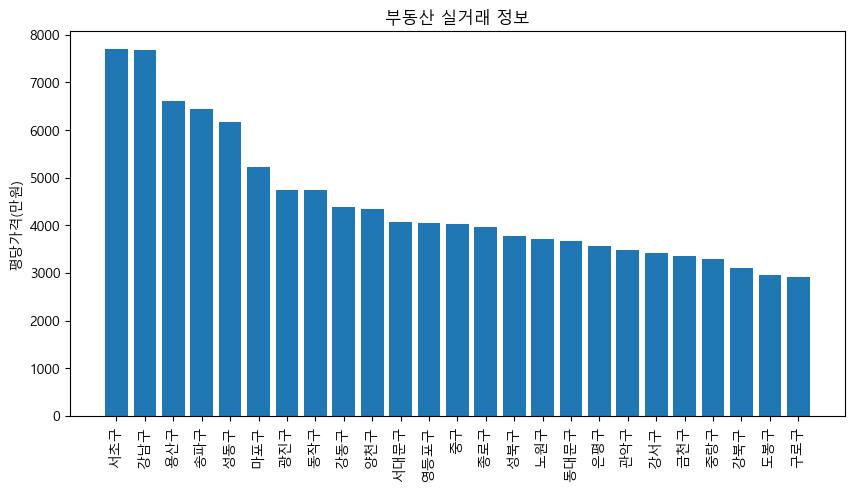

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.rcParams['font.family'] = 'Arial'  # Arial과 같은 한글 지원 폰트로 변경
plt.rcParams['axes.unicode_minus'] = False  # 음수 기호가 깨지는 문제 해결u
plt.rc('font', family='Malgun Gothic')
plt.tight_layout()
plt.xticks(rotation=90)
plt.ylabel('평당가격(만원)')
plt.title('부동산 실거래 정보')
plt.bar(new_data_4.index,new_data_4['평당가격(만원)'])